In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install imblearn
!pip install lightgbm
!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import time as timer
from sklearn.inspection import permutation_importance

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [4]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [6]:
data['bmi'] = data.bmi=(data.bmi.fillna(data['bmi'].mean()))

In [7]:
data['bmi'].isnull().sum()

0

In [8]:
data= data.drop(columns=['id'], axis=1)

In [9]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
data = data[data['smoking_status'].notnull()]

In [11]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


C:\Users\shubhendu\.conda\envs\strokeprediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='work_type', ylabel='count'>

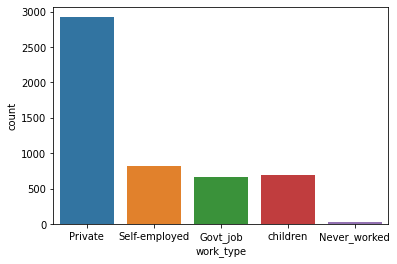

In [12]:
sns.countplot(data['work_type'])

C:\Users\shubhendu\.conda\envs\strokeprediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

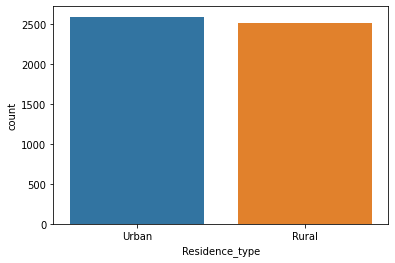

In [13]:
sns.countplot(data['Residence_type'])

C:\Users\shubhendu\.conda\envs\strokeprediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

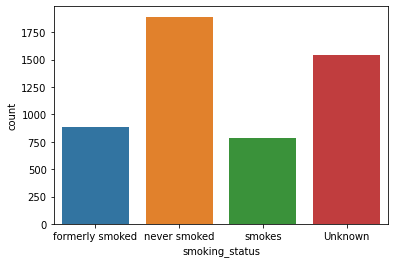

In [14]:
sns.countplot(data['smoking_status'])

C:\Users\shubhendu\.conda\envs\strokeprediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stroke', ylabel='count'>

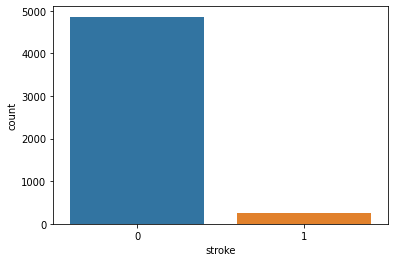

In [15]:
sns.countplot(data['stroke'])

C:\Users\shubhendu\.conda\envs\strokeprediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ever_married', ylabel='count'>

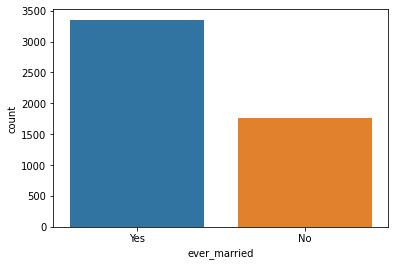

In [16]:
sns.countplot(data['ever_married'])

In [17]:
min_avg_glucose_level = min(data.avg_glucose_level)
max_avg_glucose_level = max(data.avg_glucose_level)
print(min_avg_glucose_level)
print(max_avg_glucose_level)

55.12
271.74


C:\Users\shubhendu\.conda\envs\strokeprediction\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

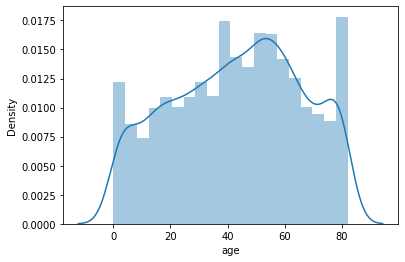

In [18]:
sns.distplot(data['age'])

C:\Users\shubhendu\.conda\envs\strokeprediction\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

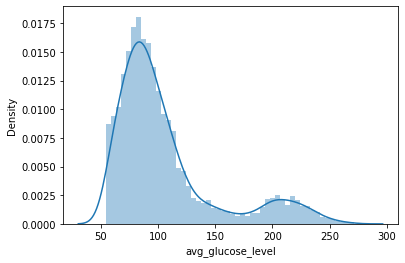

In [19]:
sns.distplot(data['avg_glucose_level'])

In [20]:
data['work_type'] = data['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})

In [21]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,0,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,1,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,0,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,0,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,1,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,0,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,1,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,1,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,0,Rural,166.29,25.600000,formerly smoked,0


In [22]:
data['gender'] = data['gender'].map({'Male':0, 'Female':1})
data['Residence_type'] = data['Residence_type'].map({'Urban':0, 'Rural':1})
data['smoking_status'] = data['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
data['ever_married'] = data['ever_married'].map({'Yes':0, 'No':1})

In [23]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,0,0,0,228.69,36.600000,0,1
1,1.0,61.0,0,0,0,1,1,202.21,28.893237,1,1
2,0.0,80.0,0,1,0,0,1,105.92,32.500000,1,1
3,1.0,49.0,0,0,0,0,0,171.23,34.400000,2,1
4,1.0,79.0,1,0,0,1,1,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1.0,80.0,1,0,0,0,0,83.75,28.893237,1,0
5106,1.0,81.0,0,0,0,1,0,125.20,40.000000,1,0
5107,1.0,35.0,0,0,0,1,1,82.99,30.600000,1,0
5108,0.0,51.0,0,0,0,0,1,166.29,25.600000,0,0


<AxesSubplot:>

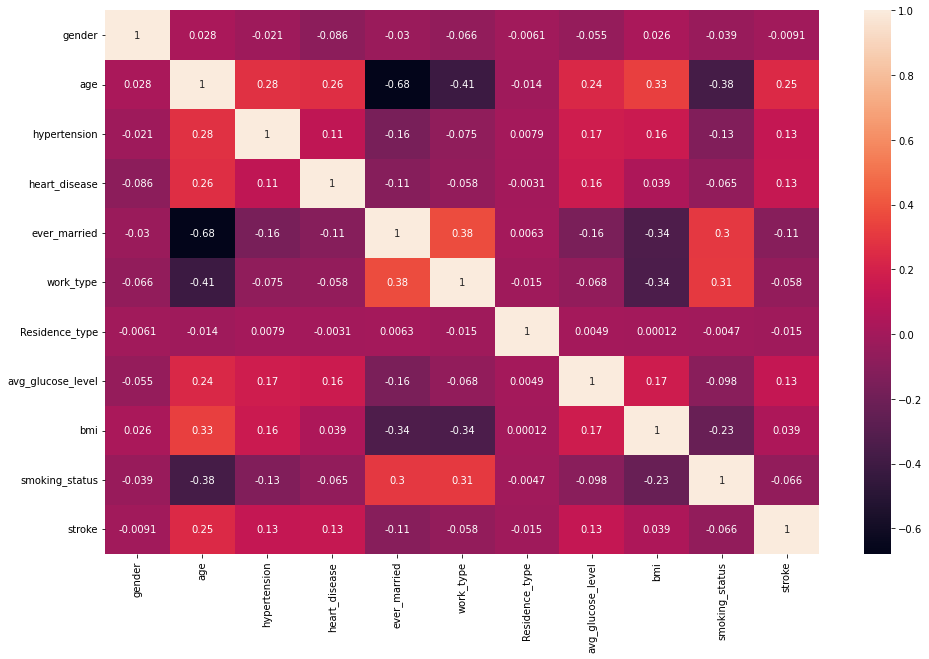

In [24]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(method='pearson'), annot=True)

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

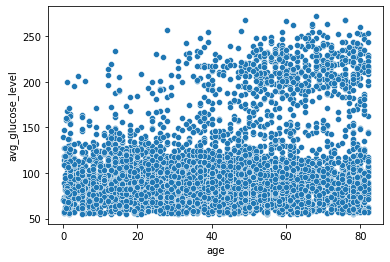

In [25]:
sns.scatterplot(x=data['age'], y=data['avg_glucose_level'])

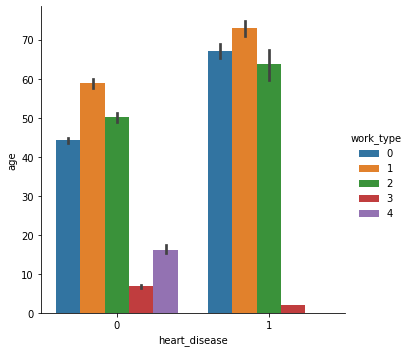

In [26]:
sns.catplot(x='heart_disease',y='age', hue="work_type", kind="bar", data=data)

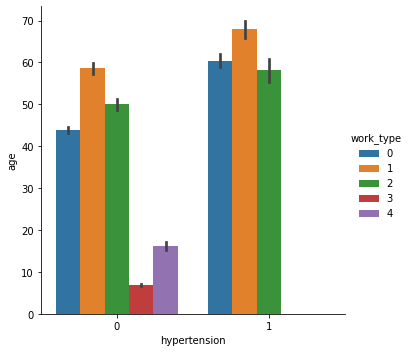

In [27]:
sns.catplot(x='hypertension',y='age', hue="work_type", kind="bar", data=data)

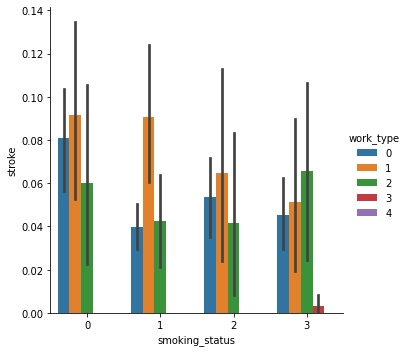

In [28]:
sns.catplot(x="smoking_status", y="stroke", hue="work_type", kind="bar", data=data)

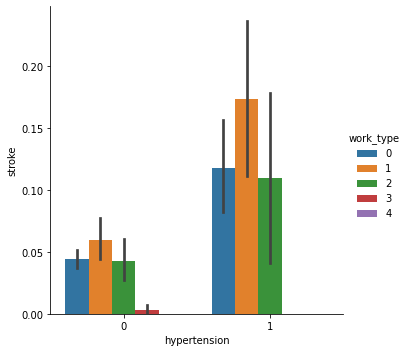

In [29]:
sns.catplot(x="hypertension", y="stroke", hue="work_type", kind="bar", data=data)

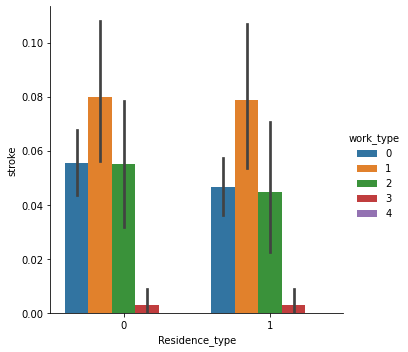

In [30]:
sns.catplot(x="Residence_type", y="stroke", hue="work_type", kind="bar", data=data)

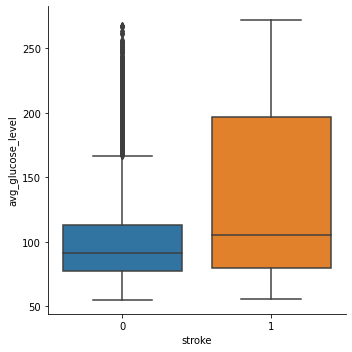

In [31]:
sns.catplot(x='stroke', y="avg_glucose_level", kind="box", data=data)

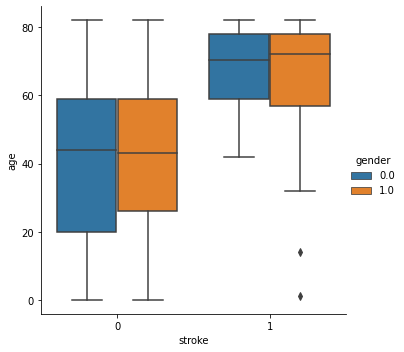

In [32]:
sns.catplot(x='stroke', y="age", hue = 'gender', kind="box", data=data)

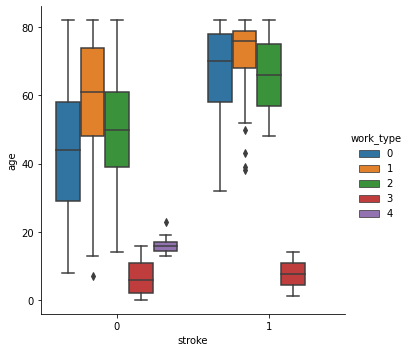

In [33]:
sns.catplot(x='stroke', y="age", hue = 'work_type', kind="box", data=data)

In [34]:
data.isnull().sum()

gender               1
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [35]:
data['gender'] = data.gender.fillna(0)

In [36]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [37]:
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender',
 'work_type',
 'smoking_status']

label = ['stroke']

X = data[features]
y = data[label]

In [38]:
X['gender'].value_counts()

1.0    2994
0.0    2116
Name: gender, dtype: int64

In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [53]:
data[features]

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender,work_type,smoking_status
0,67.0,0,1,0,0,228.69,36.600000,0.0,0,0
1,61.0,0,0,0,1,202.21,28.893237,1.0,1,1
2,80.0,0,1,0,1,105.92,32.500000,0.0,0,1
3,49.0,0,0,0,0,171.23,34.400000,1.0,0,2
4,79.0,1,0,0,1,174.12,24.000000,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,0,0,83.75,28.893237,1.0,0,1
5106,81.0,0,0,0,0,125.20,40.000000,1.0,1,1
5107,35.0,0,0,0,1,82.99,30.600000,1.0,1,1
5108,51.0,0,0,0,1,166.29,25.600000,0.0,0,0


In [50]:
X

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender,work_type,smoking_status
0,67.000000,0,1,0,0,228.690000,36.600000,0.000000,0,0
1,61.000000,0,0,0,1,202.210000,28.893237,1.000000,1,1
2,80.000000,0,1,0,1,105.920000,32.500000,0.000000,0,1
3,49.000000,0,0,0,0,171.230000,34.400000,1.000000,0,2
4,79.000000,1,0,0,1,174.120000,24.000000,1.000000,1,1
...,...,...,...,...,...,...,...,...,...,...
9717,58.080400,0,0,0,0,113.717984,25.961060,1.000000,0,2
9718,73.305806,0,0,0,0,72.850317,32.063613,0.138839,0,1
9719,77.668453,0,0,0,0,172.119096,30.487035,0.000000,0,1
9720,78.684700,0,0,0,1,78.509290,23.785883,0.228233,0,0


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [41]:

X_train.isnull().sum()

age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               0
work_type            0
smoking_status       0
dtype: int64

C:\Users\shubhendu\.conda\envs\strokeprediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stroke', ylabel='count'>

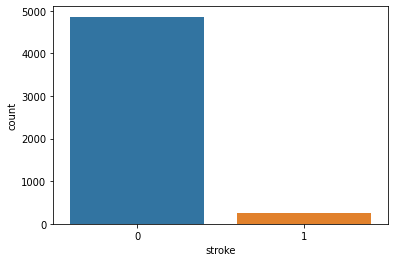

In [42]:
sns.countplot(data['stroke'])

In [54]:
X_train

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender,work_type,smoking_status
5945,80.367541,1,0,0,0,244.059440,27.404295,0.000000,0,1
2268,6.000000,0,0,1,1,108.230000,18.600000,1.000000,3,3
445,13.000000,0,0,1,1,55.390000,23.200000,0.000000,3,3
5940,81.698886,0,0,0,1,82.855657,25.566548,1.000000,0,0
3118,31.000000,0,0,0,0,88.200000,22.700000,1.000000,2,1
...,...,...,...,...,...,...,...,...,...,...
5734,78.678542,0,0,1,0,89.328251,24.185831,0.678542,0,1
5191,79.938223,0,0,0,0,76.474245,33.778341,0.938223,0,1
5390,80.879891,0,0,0,0,79.966379,30.228480,1.000000,0,1
860,46.000000,0,0,0,1,100.150000,50.300000,1.000000,0,2


In [89]:
y_train

,stroke
5945,1
2268,0
445,0
5940,1
3118,0
...,...
5734,1
5191,1
5390,1
860,0


In [55]:
X_train['smoking_status'].nunique()

4

In [56]:
X_train.shape

(7291, 10)

In [57]:
X_test.shape

(2431, 10)

In [58]:
y_train.shape

(7291, 1)

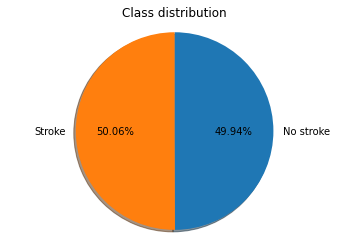

# samples associated with no stroke: 3641
# samples associated with stroke: 3650


In [59]:
_, class_counts = np.unique(y_train, return_counts=True)
class_names = ['No stroke', 'Stroke']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_counts[0]))
print("# samples associated with stroke: {}".format(class_counts[1]))

In [60]:
X_test.isnull().sum()

age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               0
work_type            0
smoking_status       0
dtype: int64

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)

In [64]:
X_train

array([[ 1.14158802,  3.30944996, -0.22522826, ..., -1.23064232,
        -0.62110101, -0.24565125],
       [-2.22420552, -0.30216502, -0.22522826, ...,  0.95212662,
         2.6477494 ,  1.65971395],
       [-1.90739318, -0.30216502, -0.22522826, ..., -1.23064232,
         2.6477494 ,  1.65971395],
       ...,
       [ 1.16477643, -0.30216502, -0.22522826, ...,  0.95212662,
        -0.62110101, -0.24565125],
       [-0.41384928, -0.30216502, -0.22522826, ...,  0.95212662,
        -0.62110101,  0.70703135],
       [ 0.76097831, -0.30216502, -0.22522826, ...,  0.92917015,
        -0.62110101, -1.19833385]])

In [65]:
X_test = sc.transform(X_test)

In [66]:
def calc_sens_spec(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # calculate the sensitivity
    sensitivity = TP / (TP + FN)    
    # calculate the specificity
    specificity = TN / (TN + FP)
    return sensitivity,specificity

In [67]:
svm_model = SVC(kernel='rbf',probability=True)
svm_model.fit(X_train, y_train)
#end = timer.time()
#print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_svm = svm_model.predict(X_test)
y_svm_prob = svm_model.predict_proba(X_test)

C:\Users\shubhendu\.conda\envs\strokeprediction\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification report for SVM: 
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1220
           1       0.85      0.91      0.88      1211

    accuracy                           0.87      2431
   macro avg       0.88      0.87      0.87      2431
weighted avg       0.88      0.87      0.87      2431

Confusion matrix for SVM: 
[[1027  193]
 [ 114 1097]]
Accuracy score for SVM: 0.87
Precision score for SVM: 0.85
Recall score for SVM: 0.91
F1 score for SVM: 0.88
Sensitivity score for SVM: 0.91
Specitivity score for SVM: 0.84
AUC score for SVM: 0.95


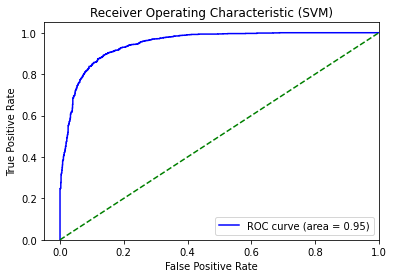

In [68]:
print("Classification report for SVM: \n{}".format(classification_report(y_test,y_svm)))
print("Confusion matrix for SVM: \n{}".format(confusion_matrix(y_test,y_svm)))
print("Accuracy score for SVM: {:.2f}".format(accuracy_score(y_test,y_svm)))
# calculate precision, recall, and f1 scores
prec_svm = precision_score(y_test,y_svm)
rec_svm = recall_score(y_test,y_svm)
f1_svm = f1_score(y_test,y_svm)
print("Precision score for SVM: {:.2f}".format(prec_svm))
print("Recall score for SVM: {:.2f}".format(rec_svm))
print("F1 score for SVM: {:.2f}".format(f1_svm))
# calculate sensitivity, specificity, and auc
sens_svm,spec_svm = calc_sens_spec(y_test,y_svm)
fpr, tpr, _ = roc_curve(y_test,  y_svm_prob[:,1])
auc_svm = roc_auc_score(y_test, y_svm_prob[:,1])
print("Sensitivity score for SVM: {:.2f}".format(sens_svm))
print("Specitivity score for SVM: {:.2f}".format(spec_svm))
print("AUC score for SVM: {:.2f}".format(auc_svm))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_svm)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (SVM)')
ax.legend(loc="lower right")
plt.show()

In [69]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
end = timer.time()
#print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_gnb = gnb_model.predict(X_test)
y_gnb_prob = gnb_model.predict_proba(X_test)

C:\Users\shubhendu\.conda\envs\strokeprediction\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification report for GNB: 
              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1220
           1       0.73      0.95      0.83      1211

    accuracy                           0.80      2431
   macro avg       0.83      0.80      0.80      2431
weighted avg       0.83      0.80      0.80      2431

Confusion matrix for GNB: 
[[ 802  418]
 [  59 1152]]
Accuracy score for GNB: 0.80
Precision score for GNB: 0.73
Recall score for GNB: 0.95
F1 score for GNB: 0.83
Sensitivity score for GNB: 0.95
Specitivity score for GNB: 0.66
AUC score for GNB: 0.89


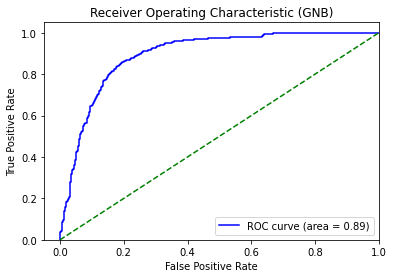

In [70]:
print("Classification report for GNB: \n{}".format(classification_report(y_test,y_gnb)))
print("Confusion matrix for GNB: \n{}".format(confusion_matrix(y_test,y_gnb)))
print("Accuracy score for GNB: {:.2f}".format(accuracy_score(y_test,y_gnb)))
# calculate precision, recall, and f1 scores
prec_gnb = precision_score(y_test,y_gnb)
rec_gnb = recall_score(y_test,y_gnb)
f1_gnb = f1_score(y_test,y_gnb)
print("Precision score for GNB: {:.2f}".format(prec_gnb))
print("Recall score for GNB: {:.2f}".format(rec_gnb))
print("F1 score for GNB: {:.2f}".format(f1_gnb))
# calculate sensitivity, specificity, and auc
sens_gnb,spec_gnb = calc_sens_spec(y_test,y_gnb)
fpr, tpr, _ = roc_curve(y_test,  y_gnb_prob[:,1])
auc_gnb = roc_auc_score(y_test, y_gnb_prob[:,1])
print("Sensitivity score for GNB: {:.2f}".format(sens_gnb))
print("Specitivity score for GNB: {:.2f}".format(spec_gnb))
print("AUC score for GNB: {:.2f}".format(auc_gnb))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_gnb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (GNB)')
ax.legend(loc="lower right")
plt.show()

In [71]:
logit_model = LogisticRegression(solver='lbfgs', random_state=42)
logit_model.fit(X_train, y_train)
#print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_logit = logit_model.predict(X_test)
y_logit_prob = logit_model.predict_proba(X_test)

C:\Users\shubhendu\.conda\envs\strokeprediction\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification report for LR: 
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1220
           1       0.81      0.89      0.84      1211

    accuracy                           0.84      2431
   macro avg       0.84      0.84      0.84      2431
weighted avg       0.84      0.84      0.84      2431

Confusion matrix for LR: 
[[ 963  257]
 [ 139 1072]]
Accuracy score for LR: 0.84
Precision score for LR: 0.81
Recall score for LR: 0.89
F1 score for LR: 0.84
Sensitivity score for LR: 0.89
Specitivity score for LR: 0.79
AUC score for LR: 0.91


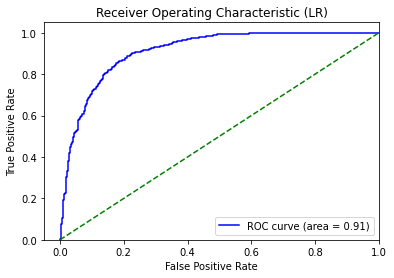

In [72]:
print("Classification report for LR: \n{}".format(classification_report(y_test,y_logit)))
print("Confusion matrix for LR: \n{}".format(confusion_matrix(y_test,y_logit)))
print("Accuracy score for LR: {:.2f}".format(accuracy_score(y_test,y_logit)))
# calculate precision, recall, and f1 scores
prec_logit = precision_score(y_test,y_logit)
rec_logit = recall_score(y_test,y_logit)
f1_logit = f1_score(y_test,y_logit)
print("Precision score for LR: {:.2f}".format(prec_logit))
print("Recall score for LR: {:.2f}".format(rec_logit))
print("F1 score for LR: {:.2f}".format(f1_logit))
# calculate sensitivity, specificity, and auc
sens_logit,spec_logit = calc_sens_spec(y_test,y_logit)
fpr, tpr, _ = roc_curve(y_test,  y_logit_prob[:,1])
auc_logit = roc_auc_score(y_test, y_logit_prob[:,1])
print("Sensitivity score for LR: {:.2f}".format(sens_logit))
print("Specitivity score for LR: {:.2f}".format(spec_logit))
print("AUC score for LR: {:.2f}".format(auc_logit))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_logit)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (LR)')
ax.legend(loc="lower right")
plt.show()

In [73]:
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train, y_train)

#print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_dtree = dtree_model.predict(X_test)
y_dtree_prob = dtree_model.predict_proba(X_test)

Classification report for DT: 
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1220
           1       0.90      0.93      0.92      1211

    accuracy                           0.92      2431
   macro avg       0.92      0.92      0.92      2431
weighted avg       0.92      0.92      0.92      2431

Confusion matrix for DT: 
[[1096  124]
 [  80 1131]]
Accuracy score for DT: 0.92
Precision score for DT: 0.90
Recall score for DT: 0.93
F1 score for DT: 0.92
Sensitivity score for DT: 0.93
Specitivity score for DT: 0.90
AUC score for DT: 0.92


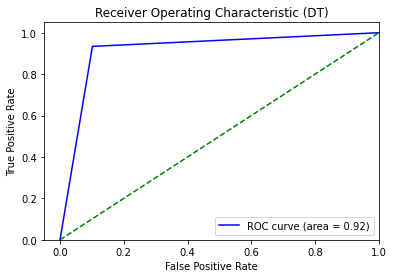

In [74]:
print("Classification report for DT: \n{}".format(classification_report(y_test,y_dtree)))
print("Confusion matrix for DT: \n{}".format(confusion_matrix(y_test,y_dtree)))
print("Accuracy score for DT: {:.2f}".format(accuracy_score(y_test,y_dtree)))
# calculate precision, recall, and f1 scores
prec_dtree = precision_score(y_test,y_dtree)
rec_dtree = recall_score(y_test,y_dtree)
f1_dtree = f1_score(y_test,y_dtree)
print("Precision score for DT: {:.2f}".format(prec_dtree))
print("Recall score for DT: {:.2f}".format(rec_dtree))
print("F1 score for DT: {:.2f}".format(f1_dtree))
# calculate sensitivity, specificity, and auc
sens_dtree,spec_dtree = calc_sens_spec(y_test,y_dtree)
fpr, tpr, _ = roc_curve(y_test,  y_dtree_prob[:,1])
auc_dtree = roc_auc_score(y_test, y_dtree_prob[:,1])
print("Sensitivity score for DT: {:.2f}".format(sens_dtree))
print("Specitivity score for DT: {:.2f}".format(spec_dtree))
print("AUC score for DT: {:.2f}".format(auc_dtree))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_dtree)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (DT)')
ax.legend(loc="lower right")
plt.show()

In [75]:
ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_model.fit(X_train, y_train)

#print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_ranfor = ranfor_model.predict(X_test)
y_ranfor_prob = ranfor_model.predict_proba(X_test)

C:\Users\shubhendu\.conda\envs\strokeprediction\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Classification report for RF: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1220
           1       0.95      0.96      0.96      1211

    accuracy                           0.96      2431
   macro avg       0.96      0.96      0.96      2431
weighted avg       0.96      0.96      0.96      2431

Confusion matrix for RF: 
[[1164   56]
 [  51 1160]]
Accuracy score for RF: 0.96
Precision score for RF: 0.95
Recall score for RF: 0.96
F1 score for RF: 0.96
Sensitivity score for RF: 0.96
Specitivity score for RF: 0.95
AUC score for RF: 0.99


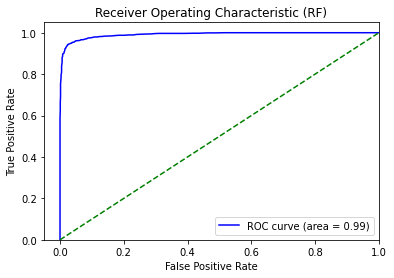

In [76]:
print("Classification report for RF: \n{}".format(classification_report(y_test,y_ranfor)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(y_test,y_ranfor)))
print("Accuracy score for RF: {:.2f}".format(accuracy_score(y_test,y_ranfor)))
# calculate precision, recall, and f1 scores
prec_ranfor = precision_score(y_test,y_ranfor)
rec_ranfor = recall_score(y_test,y_ranfor)
f1_ranfor = f1_score(y_test,y_ranfor)
print("Precision score for RF: {:.2f}".format(prec_ranfor))
print("Recall score for RF: {:.2f}".format(rec_ranfor))
print("F1 score for RF: {:.2f}".format(f1_ranfor))
# calculate sensitivity, specificity, and auc
sens_ranfor,spec_ranfor = calc_sens_spec(y_test,y_ranfor)
fpr, tpr, _ = roc_curve(y_test,  y_ranfor_prob[:,1])
auc_ranfor = roc_auc_score(y_test, y_ranfor_prob[:,1])
print("Sensitivity score for RF: {:.2f}".format(sens_ranfor))
print("Specitivity score for RF: {:.2f}".format(spec_ranfor))
print("AUC score for RF: {:.2f}".format(auc_ranfor))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ranfor)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (RF)')
ax.legend(loc="lower right")
plt.show()

In [77]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

#print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_xgb = xgb_model.predict(X_test)
y_xgb_prob = xgb_model.predict_proba(X_test)

[12:27:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shubhendu\.conda\envs\strokeprediction\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\shubhendu\.conda\envs\strokeprediction\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shubhendu\.conda\envs\strokeprediction\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [78]:
X_test[0:20]

array([[-2.17894662, -0.30216502, -0.22522826,  2.08736446, -0.74403659,
        -0.54650343, -1.83491014,  0.95212662,  2.6477494 ,  1.65971395],
       [ 0.898659  , -0.30216502, -0.22522826, -0.47907302, -0.74403659,
        -0.23824127, -0.07332036, -0.80392711, -0.62110101,  1.65971395],
       [ 0.49132885, -0.30216502, -0.22522826, -0.47907302, -0.74403659,
        -0.28687354,  0.57145803, -1.23064232, -0.62110101, -0.24565125],
       [ 0.1745165 , -0.30216502, -0.22522826, -0.47907302, -0.74403659,
        -0.45677707, -0.65471683, -1.23064232, -0.62110101,  0.70703135],
       [ 0.68085947, -0.30216502, -0.22522826, -0.47907302, -0.74403659,
        -0.67935271, -0.03983887, -0.63961965, -0.62110101, -0.24565125],
       [ 0.98917681, -0.30216502, -0.22522826, -0.47907302, -0.74403659,
        -0.24705522,  0.24958713,  0.95212662, -0.62110101, -0.24565125],
       [-1.13799177, -0.30216502, -0.22522826,  2.08736446, -0.74403659,
        -0.23246117, -0.40948186, -1.23064232

In [100]:
prediction = xgb_model.predict([[-2.22420552, -0.30216502, -0.22522826,  2.08736446,  1.34401991,
        -0.19696701, -1.74294702,  0.95212662,  2.6477494 ,  1.65971395]])

In [101]:
round(prediction[0],2)

0

In [98]:
d = sc.transform([[6, 0, 0, 1, 1, 108, 18, 1, 3, 3]])

C:\Users\shubhendu\.conda\envs\strokeprediction\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [99]:
d

array([[-2.22420552, -0.30216502, -0.22522826,  2.08736446,  1.34401991,
        -0.19696701, -1.74294702,  0.95212662,  2.6477494 ,  1.65971395]])

In [83]:
prediction.shape

(1,)

Classification report for XGB: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1220
           1       0.97      0.96      0.96      1211

    accuracy                           0.96      2431
   macro avg       0.96      0.96      0.96      2431
weighted avg       0.96      0.96      0.96      2431

Confusion matrix for XGB: 
[[1179   41]
 [  48 1163]]
Accuracy score for XGB: 0.96
Precision score for XGB: 0.97
Recall score for XGB: 0.96
F1 score for XGB: 0.96
Sensitivity score for XGB: 0.96
Specitivity score for XGB: 0.97
AUC score for XGB: 0.99


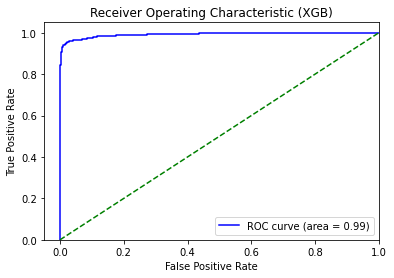

In [84]:
print("Classification report for XGB: \n{}".format(classification_report(y_test,y_xgb)))
print("Confusion matrix for XGB: \n{}".format(confusion_matrix(y_test,y_xgb)))
print("Accuracy score for XGB: {:.2f}".format(accuracy_score(y_test,y_xgb)))
# calculate precision, recall, and f1 scores
prec_xgb = precision_score(y_test,y_xgb)
rec_xgb = recall_score(y_test,y_xgb)
f1_xgb = f1_score(y_test,y_xgb)
print("Precision score for XGB: {:.2f}".format(prec_xgb))
print("Recall score for XGB: {:.2f}".format(rec_xgb))
print("F1 score for XGB: {:.2f}".format(f1_xgb))
# calculate sensitivity, specificity, and auc
sens_xgb,spec_xgb = calc_sens_spec(y_test,y_xgb)
fpr, tpr, _ = roc_curve(y_test,  y_xgb_prob[:,1])
auc_xgb = roc_auc_score(y_test, y_xgb_prob[:,1])
print("Sensitivity score for XGB: {:.2f}".format(sens_xgb))
print("Specitivity score for XGB: {:.2f}".format(spec_xgb))
print("AUC score for XGB: {:.2f}".format(auc_xgb))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_xgb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (XGB)')
ax.legend(loc="lower right")
plt.show()

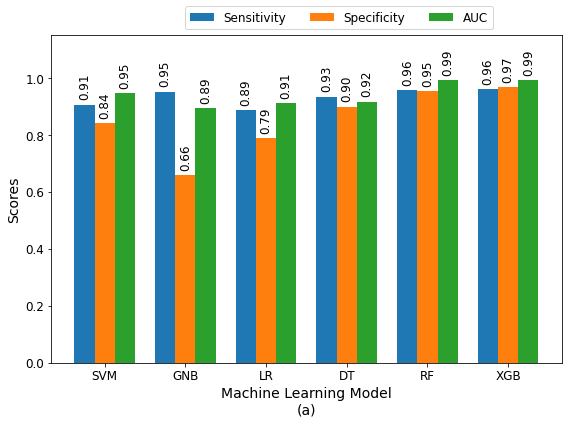

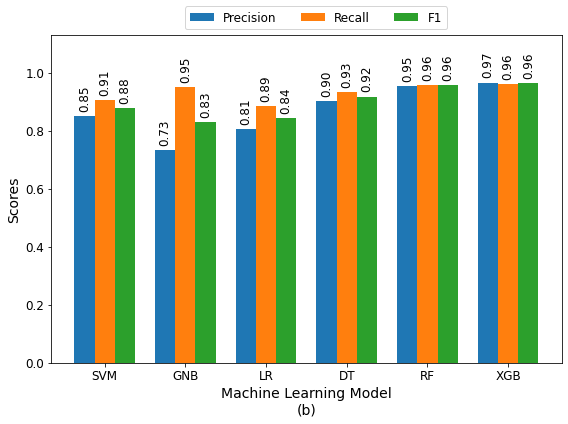

In [85]:
ml_names = ['SVM', 'GNB', 'LR', 'DT', 'RF', 'XGB']
sens_all = [sens_svm, sens_gnb, sens_logit, sens_dtree, sens_ranfor,  sens_xgb]
spec_all = [spec_svm, spec_gnb, spec_logit, spec_dtree, spec_ranfor,  spec_xgb]
auc_all = [auc_svm, auc_gnb, auc_logit, auc_dtree, auc_ranfor,  auc_xgb]

prec_all = [prec_svm, prec_gnb, prec_logit, prec_dtree, prec_ranfor,  prec_xgb]
rec_all = [rec_svm, rec_gnb, rec_logit, rec_dtree, rec_ranfor,  rec_xgb]
f1_all = [f1_svm, f1_gnb, f1_logit, f1_dtree, f1_ranfor,  f1_xgb]

def autolabel(bars):
    
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.25  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, sens_all, width, label='Sensitivity')
bar2 = ax.bar(r2, spec_all, width, label='Specificity')
bar3 = ax.bar(r3, auc_all, width, label='AUC')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.15])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(a)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_auc.pdf", bbox_inches='tight')
plt.show()

# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, prec_all, width, label='Precision')
bar2 = ax.bar(r2, rec_all, width, label='Recall')
bar3 = ax.bar(r3, f1_all, width, label='F1')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.13])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(b)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_f1.pdf", bbox_inches='tight')
plt.show()

C:\Users\shubhendu\.conda\envs\strokeprediction\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\shubhendu\.conda\envs\strokeprediction\lib\site-packages\ipykernel_launcher.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator


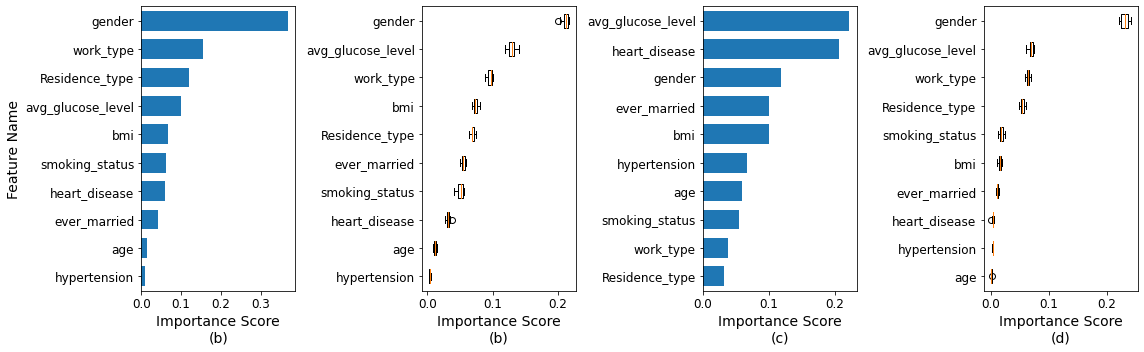

In [86]:
# feature importance from random forest
feature_names = data.columns[:-1].to_numpy()
ranfor_perm_imp = permutation_importance(ranfor_model, X_test, y_test, n_repeats=10, random_state=42)
ranfor_perm_sort_idx = ranfor_perm_imp.importances_mean.argsort()

ranfor_tree_sort_idx = np.argsort(ranfor_model.feature_importances_)
ranfor_indices = np.arange(0, len(ranfor_model.feature_importances_)) + 0.5

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 5))
ax1.barh(ranfor_indices,ranfor_model.feature_importances_[ranfor_tree_sort_idx], height=0.7)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel("Importance Score\n(b)",fontsize=14)
ax1.set_ylabel("Feature Name",fontsize=14)
ax1.set_yticklabels(feature_names[ranfor_tree_sort_idx])
ax1.set_yticks(ranfor_indices)
ax1.set_ylim((0, len(ranfor_model.feature_importances_)))
ax2.boxplot(ranfor_perm_imp.importances[ranfor_perm_sort_idx].T,vert=False,labels=feature_names[ranfor_perm_sort_idx])
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlabel("Importance Score\n(b)",fontsize=14)

# feature importance from XGBoost
xgb_perm_imp = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=42)
xgb_perm_sort_idx = xgb_perm_imp.importances_mean.argsort()

xgb_tree_sort_idx = np.argsort(xgb_model.feature_importances_)
xgb_indices = np.arange(0, len(xgb_model.feature_importances_)) + 0.5

ax3.barh(xgb_indices,xgb_model.feature_importances_[xgb_tree_sort_idx], height=0.7)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.set_xlabel("Importance Score\n(c)",fontsize=14)
ax3.set_yticklabels(feature_names[xgb_tree_sort_idx])
ax3.set_yticks(xgb_indices)
ax3.set_ylim((0, len(xgb_model.feature_importances_)))
ax4.boxplot(xgb_perm_imp.importances[xgb_perm_sort_idx].T,vert=False,labels=feature_names[xgb_perm_sort_idx])
ax4.tick_params(axis='both', which='major', labelsize=12)
ax4.set_xlabel("Importance Score\n(d)",fontsize=14)
fig.tight_layout()
fig.savefig("feature_importance.pdf", bbox_inches='tight')
plt.show()

In [87]:
import pickle
file = open('xgboost_model.pkl','wb')
pickle.dump(xgb_model, file)

In [88]:
file.flush()